In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,ShuffleSplit,RandomizedSearchCV
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
train_data=pd.read_csv('/Users/govindprasad/Downloads/titanic/train.csv')
test_data=pd.read_csv('/Users/govindprasad/Downloads/titanic/test.csv')
sub_data=pd.read_csv('/Users/govindprasad/Downloads/titanic/gender_submission.csv')

In [219]:
sub_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


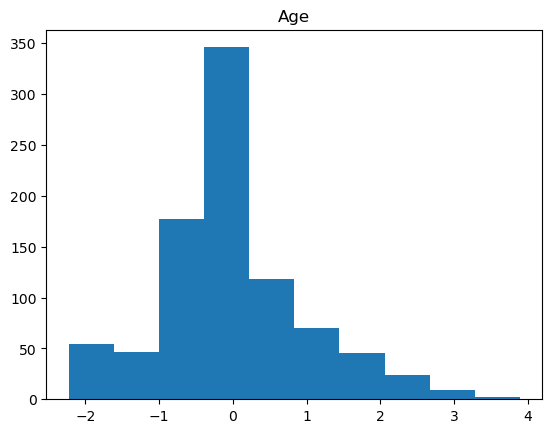

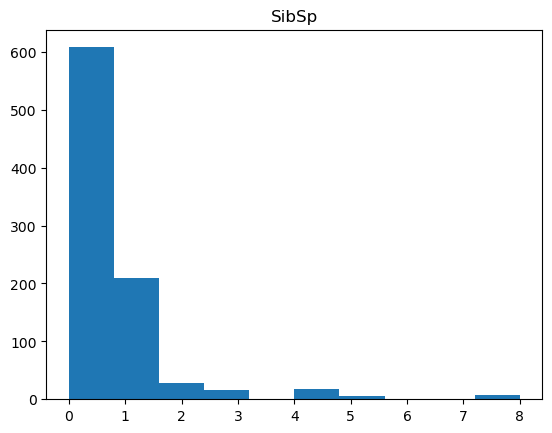

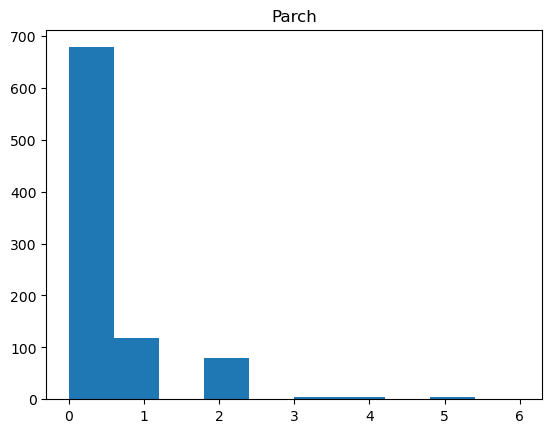

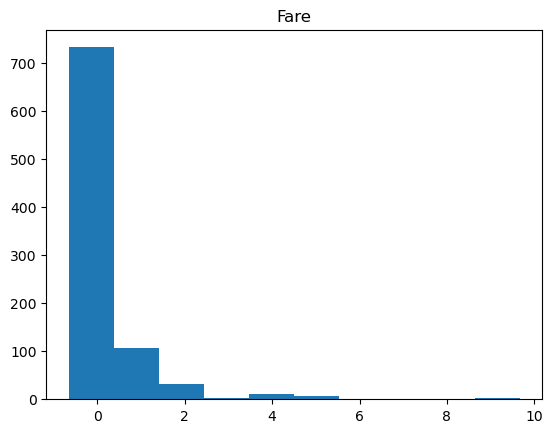

In [49]:
train_dataNum=train_data[['Age','SibSp','Parch','Fare']]
for i in train_dataNum.columns:
    plt.hist(train_dataNum[i])
    plt.title(i)
    plt.show()
   

In [6]:
sub_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_data.Age.head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [29]:
agena=train_data.Age.median()
farena=train_data.Fare.median()
train_data.fillna({'Age':agena},inplace=True)
test_data.fillna({'Age':agena},inplace=True)
train_data.fillna({'Age':farena},inplace=True)
test_data.fillna({'Age':farena},inplace=True)

In [19]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [23]:
train_data['Family']=train_data['SibSp'] + train_data['Parch']# Combining sibling and parent children
#to single column as family.
test_data['Family']=train_data['SibSp'] + train_data['Parch']
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0


In [25]:
test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,0


In [33]:
train_data.shape

(891, 10)

In [213]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34,0,0,7.8292,1,False,True,False
1,893,3,0,47,1,0,7.0000,1,False,False,True
2,894,2,1,62,0,0,9.6875,0,False,True,False
3,895,3,1,27,0,0,8.6625,1,False,False,True
4,896,3,0,22,1,1,12.2875,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,28,0,0,8.0500,0,False,False,True
414,1306,1,0,39,0,0,108.9000,0,True,False,False
415,1307,3,1,38,0,0,7.2500,0,False,False,True
416,1308,3,1,28,0,0,8.0500,2,False,False,True


In [39]:
#Also we need to scale features like Age and Fare
ss=StandardScaler()
train_data[['Age','Fare']]=ss.fit_transform(train_data[['Age','Fare']])
test_data[['Age','Fare']]=ss.transform(test_data[['Age','Fare']])


In [57]:
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test_data['Sex']=le.fit_transform(test_data['Sex'])
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,1,-1,1,0,-0.502445,S,1
1,2,1,1,0,1,1,0,0.786845,C,1
2,3,1,3,0,0,0,0,-0.488854,S,0
3,4,1,1,0,0,1,0,0.420730,S,1
4,5,0,3,1,0,0,0,-0.486337,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,0,-0.386671,S,0
887,888,1,1,0,-1,0,0,-0.044381,S,0
888,889,0,3,0,0,1,2,-0.176263,S,3
889,890,1,1,1,0,0,0,-0.044381,C,0


In [65]:
train_data['Age']=train_data['Age'].apply(lambda x: int(round(x)))
test_data['Age']=test_data['Age'].apply(lambda x: int(round(x)))

In [67]:
train_data=pd.get_dummies(train_data,columns=['Embarked'])
test_data=pd.get_dummies(test_data,columns=['Embarked'])

In [71]:
X=train_data.drop(['Survived','PassengerId'],axis=1)
y=train_data.Survived

In [107]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
347,3,0,0,1,0,-0.324253,1,False,False,True
674,2,1,0,0,0,-0.648422,0,False,False,True
791,2,1,-1,0,0,-0.124920,0,False,False,True
836,3,1,-1,0,0,-0.474005,0,False,False,True
56,2,0,-1,0,0,-0.437007,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...
694,1,1,2,0,0,-0.113846,0,False,False,True
428,3,1,0,0,0,-0.492378,0,False,True,False
431,3,0,0,1,0,-0.324253,1,False,False,True
563,3,1,0,0,0,-0.486337,0,False,False,True


In [121]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=20,test_size=0.2)

In [123]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
clf.score(X_test,y_test)

0.776536312849162

In [101]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)

Text(95.72222222222221, 0.5, 'True')

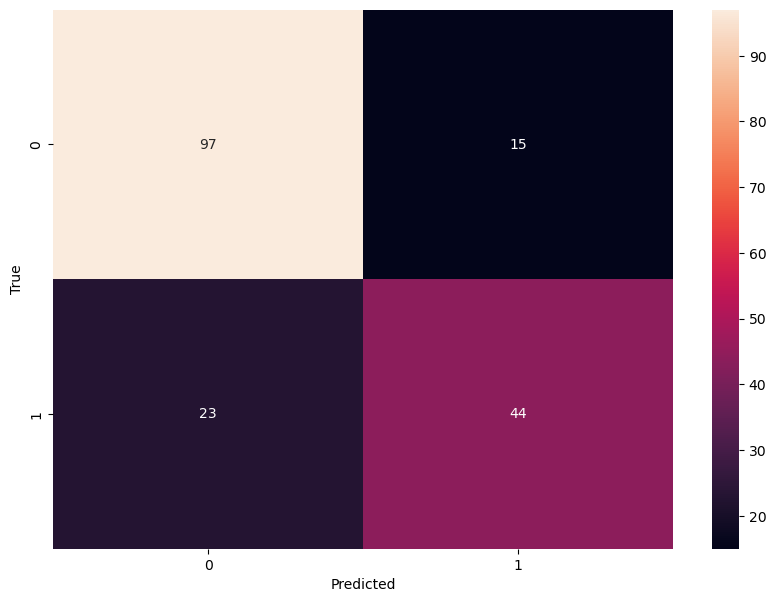

In [103]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [171]:
#using Cross Val Score
sp=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
cv=cross_val_score(clf,X,y,cv=sp)
np.average(cv)

0.8212290502793296

In [147]:
#Hyper parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']}

In [185]:
grid=RandomizedSearchCV(clf
             ,param_distributions=param_grid,
             cv=sp
             ,return_train_score=False,)
grid.fit(X,y)

/Users/govindprasad/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/govindprasad/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/govindprasad/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/govindprasad/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300]})

In [205]:
grid.best_params_

{'n_estimators': 300,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [201]:
result=grid.cv_results_
cvres=pd.DataFrame(result)
cvres[['params','param_n_estimators','param_max_features','param_max_depth','param_criterion','mean_test_score','rank_test_score']]

,params,param_n_estimators,param_max_features,param_max_depth,param_criterion,mean_test_score,rank_test_score
0,"{'n_estimators': 200, 'max_features': 'sqrt', ...",200,sqrt,6,entropy,0.833520,4
1,"{'n_estimators': 100, 'max_features': 'auto', ...",100,auto,5,entropy,NaN,10
2,"{'n_estimators': 300, 'max_features': 'sqrt', ...",300,sqrt,7,entropy,0.837989,1
3,"{'n_estimators': 200, 'max_features': 'log2', ...",200,log2,7,gini,0.835754,2
4,"{'n_estimators': 300, 'max_features': 'log2', ...",300,log2,7,entropy,0.835754,2
5,"{'n_estimators': 100, 'max_features': 'log2', ...",100,log2,5,gini,0.832402,6
6,"{'n_estimators': 200, 'max_features': 'sqrt', ...",200,sqrt,8,gini,0.830168,8
7,"{'n_estimators': 300, 'max_features': 'sqrt', ...",300,sqrt,4,gini,0.831285,7
8,"{'n_estimators': 100, 'max_features': 'sqrt', ...",100,sqrt,6,entropy,0.833520,4
9,"{'n_estimators': 300, 'max_features': 'sqrt', ...",300,sqrt,4,entropy,0.829050,9


In [235]:
model=grid.best_estimator_
prediction=model.predict(test_data.drop('PassengerId',axis=1))
final_sub=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':prediction})
#output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': prediction})

In [239]:
final_sub.to_csv('Submission')